In [ ]:
!pip install keras==2.12.0
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [ ]:
# first neural network with keras tutorial
from pandas import read_csv
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import random as rn
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

In [ ]:
filename = "/content/Alphabets_data.csv"
df_alphabets = read_csv(filename)

### EDA

In [ ]:
df_alphabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
df_alphabets.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [ ]:
df_alphabets.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_alphabets['letter'] = label_encoder.fit_transform(df_alphabets['letter'])

In [ ]:
x = df_alphabets.iloc[:,1:]
y = df_alphabets['letter']

In [ ]:
from keras.utils import to_categorical

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_y)

<Axes: >

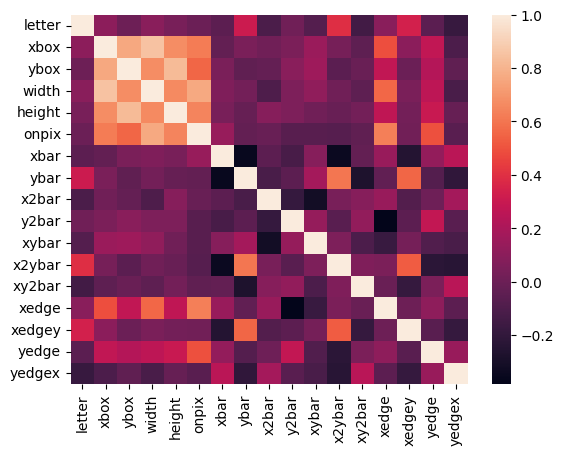

In [ ]:
sns.heatmap(df_alphabets.corr())

Model building,fiting

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(10, input_shape=(x_train.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dropout(0.1))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(26, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 566
Trainable params: 566
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(x,
                    dummy_y,
                    callbacks=[es],
                    epochs=20, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
1600/1600 [==============================] - 5s 2ms/step - loss: 2.8532 - accuracy: 0.1811 - val_loss: 2.1702 - val_accuracy: 0.3915
Epoch 2/20
1600/1600 [==============================] - 3s 2ms/step - loss: 2.1830 - accuracy: 0.3269 - val_loss: 1.7970 - val_accuracy: 0.4782
Epoch 3/20
1600/1600 [==============================] - 3s 2ms/step - loss: 1.9984 - accuracy: 0.3659 - val_loss: 1.6546 - val_accuracy: 0.4942
Epoch 4/20
1600/1600 [==============================] - 4s 3ms/step - loss: 1.9025 - accuracy: 0.3943 - val_loss: 1.5732 - val_accuracy: 0.5395
Epoch 5/20
1600/1600 [==============================] - 3s 2ms/step - loss: 1.8509 - accuracy: 0.4100 - val_loss: 1.5176 - val_accuracy: 0.5583
Epoch 6/20
1600/1600 [==============================] - 3s 2ms/step - loss: 1.8148 - accuracy: 0.4227 - val_loss: 1.4751 - val_accuracy: 0.5717
Epoch 7/20
1600/1600 [==============================] - 3s 2ms/step - loss: 1.7611 - accuracy: 0.4452 - val_loss: 1.4420 - val_accuracy:

In [ ]:
scores = model.evaluate(x, dummy_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

625/625 [==============================] - 3s 3ms/step - loss: 1.2243 - accuracy: 0.6436
accuracy: 64.36%


### Hyperparameter tuning

Epoch and batch size using Manual Grid Search

In [ ]:
def FunctionFindBestParams(x, dummy_y):

    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[10, 40 ,50 ,100]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            print(TrialNumber)
            TrialNumber+=1

            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10, input_dim=16, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=26, kernel_initializer='uniform', activation='softmax'))
            classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


            survivalANN_Model=classifier.fit(x,dummy_y, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            df1 = pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'])
             #SearchResultsData=SearchResultsData.concat(df1, ignore_index=True,axis=0)
            SearchResultsData = pd.concat([SearchResultsData,df1],ignore_index=True)
    return(SearchResultsData)


In [ ]:
# Calling the function
ResultsData=FunctionFindBestParams(x, dummy_y)

0
1 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.5367000102996826
1
2 Parameters: batch_size: 5 - epochs: 40 Accuracy: 0.7140499949455261
2
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.6982499957084656
3
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.7214999794960022
4
5 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.5945000052452087
5
6 Parameters: batch_size: 10 - epochs: 40 Accuracy: 0.7250000238418579
6
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.6402000188827515
7
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.49985000491142273
8
9 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.38999998569488525
9
10 Parameters: batch_size: 15 - epochs: 40 Accuracy: 0.6891999840736389
10
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.6593000292778015
11
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.7125999927520752
12
13 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.2503499984741211
13
14 Parameters: batch_size: 20 - epochs: 

In [ ]:
ResultsData

,TrialNumber,Parameters,Accuracy
0,1,batch_size5-epoch10,0.53670
1,2,batch_size5-epoch40,0.71405
2,3,batch_size5-epoch50,0.69825
3,4,batch_size5-epoch100,0.72150
4,5,batch_size10-epoch10,0.59450
5,6,batch_size10-epoch40,0.72500
6,7,batch_size10-epoch50,0.64020
7,8,batch_size10-epoch100,0.49985
8,9,batch_size15-epoch10,0.39000
9,10,batch_size15-epoch40,0.68920


batch 10 and epoch 40 having accuracy 72.5

learning rate andd dropout rate using GridSearchCV

In [ ]:
# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(10,input_dim = 16,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(26,activation = 'softmax'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 40)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,dummy_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.758 total time= 2.4min
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.752 total time= 1.5min
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.735 total time= 1.6min
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.757 total time= 1.6min
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.754 total time= 1.8min
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7513000130653381, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7513000130653381,0.00827557604131438 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.18089999556541442,0.1843739046483981 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.03685000017285347,0.0027820849602262863 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.6442500114440918,0.02485609350695082 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.294750003516674,0.0962611095448978 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.03685000017285347,0.0027820849602262863 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.5797000169754029,0.030143585589503814 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.12355000302195548,0.092681097319192 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.03685000017285347,0.0027820849602262863 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [ ]:
grid_result.best_params_

{'dropout_rate': 0.0, 'learning_rate': 0.001}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, dummy_y, test_size=0.3)

Number of Neurons in activation layer

In [ ]:
def FunctionFindBestParams(x_train, dummy_y):

    # Defining the list of hyper parameters to try
    TrialNumber=0
    nuerons1 = [8,10,16]
    nuerons2 = [8,10]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    #adam = Adam(learning_rate = 0.001)
    for nueron1 in nuerons1:
        for nueron2 in nuerons2:
            print(TrialNumber)
            TrialNumber+=1

            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=nueron1, input_dim=16, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dropout(0.0))
            classifier.add(Dense(units=nueron2, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dropout(0.0))
            classifier.add(Dense(units=26, kernel_initializer='uniform', activation='softmax'))
            classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


            survivalANN_Model=classifier.fit(x,dummy_y, batch_size=10 , epochs=40, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','nueron1:', nueron1,'-', 'nueron2:',nueron2, 'Accuracy:', Accuracy)
            df1 = pd.DataFrame(data=[[TrialNumber,
                            'Nueron1'+str(nueron1)+'-'+'Nueron2'+str(nueron2), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'])
             #SearchResultsData=SearchResultsData.concat(df1, ignore_index=True,axis=0)
            SearchResultsData = pd.concat([SearchResultsData,df1],ignore_index=True)
    return(SearchResultsData)


In [ ]:
ResultsData = FunctionFindBestParams(x_train, dummy_y)
ResultsData

0
1 Parameters: nueron1: 8 - nueron2: 8 Accuracy: 0.6671000123023987
1
2 Parameters: nueron1: 8 - nueron2: 10 Accuracy: 0.7013499736785889
2
3 Parameters: nueron1: 10 - nueron2: 8 Accuracy: 0.6340000033378601
3
4 Parameters: nueron1: 10 - nueron2: 10 Accuracy: 0.7077000141143799
4
5 Parameters: nueron1: 16 - nueron2: 8 Accuracy: 0.7275500297546387
5
6 Parameters: nueron1: 16 - nueron2: 10 Accuracy: 0.708050012588501


,TrialNumber,Parameters,Accuracy
0,1,Nueron18-Nueron28,0.66710
1,2,Nueron18-Nueron210,0.70135
2,3,Nueron110-Nueron28,0.63400
3,4,Nueron110-Nueron210,0.70770
4,5,Nueron116-Nueron28,0.72755
5,6,Nueron116-Nueron210,0.70805


Activation Function and Kernel Initializer

In [ ]:
from keras.layers import Dropout
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(16,input_dim = 16,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(8,kernel_initializer = init ,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(26,activation = 'softmax'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 40)

# Define the grid search parameters

activation_function = ['relu','tanh','linear']
# Softmax activation is typically used as the final activation function in a neural network for multiclass classification problems.
init = ['uniform','normal']

# Make a dictionary of the grid search parameters

param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=relu, init=uniform......................
[CV 1/5; 1/6] END activation_function=relu, init=uniform;, score=0.762 total time= 1.4min
[CV 2/5; 1/6] START activation_function=relu, init=uniform......................
[CV 2/5; 1/6] END activation_function=relu, init=uniform;, score=0.696 total time= 1.4min
[CV 3/5; 1/6] START activation_function=relu, init=uniform......................
[CV 3/5; 1/6] END activation_function=relu, init=uniform;, score=0.588 total time= 1.2min
[CV 4/5; 1/6] START activation_function=relu, init=uniform......................
[CV 4/5; 1/6] END activation_function=relu, init=uniform;, score=0.694 total time= 1.2min
[CV 5/5; 1/6] START activation_function=relu, init=uniform......................
[CV 5/5; 1/6] END activation_function=relu, init=uniform;, score=0.721 total time= 1.2min
[CV 1/5; 2/6] START activation_function=relu, init=normal.......................
[CV 

In [ ]:
# Summarize the results
print('Best : {}, using {}\n'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7627999901771545, using {'activation_function': 'tanh', 'init': 'normal'}

0.6921333312988281,0.05754596619759753 with: {'activation_function': 'relu', 'init': 'uniform'}
0.6719333291053772,0.10569607915336139 with: {'activation_function': 'relu', 'init': 'normal'}
0.7543333292007446,0.014452986139786003 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7627999901771545,0.008177465378321303 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7167333245277405,0.009240970273473714 with: {'activation_function': 'linear', 'init': 'uniform'}
0.7207333207130432,0.011780217007292685 with: {'activation_function': 'linear', 'init': 'normal'}


In [ ]:
model = Sequential()
model.add(Dense(16, input_shape=(x.shape[1],),kernel_initializer ='normal', activation='tanh')) # input shape is (features,)
model.add(Dropout(0.0))
model.add(Dense(8,kernel_initializer ='normal', activation='tanh'))
model.add(Dropout(0.0))
model.add(Dense(26, activation='softmax'))
model.summary()
adam = Adam(learning_rate = 0.001)
# compile the model
model.compile(optimizer=adam,
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 16)                272       
                                                                 
 dropout_68 (Dropout)        (None, 16)                0         
                                                                 
 dense_118 (Dense)           (None, 8)                 136       
                                                                 
 dropout_69 (Dropout)        (None, 8)                 0         
                                                                 
 dense_119 (Dense)           (None, 26)                234       
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in
# the validation loss for 10 consecutive epochs.
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(x,
                    dummy_y,
                    callbacks=[es],
                    epochs=40, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/40
1600/1600 [==============================] - 4s 2ms/step - loss: 2.4626 - accuracy: 0.3159 - val_loss: 1.8887 - val_accuracy: 0.4610
Epoch 2/40
1600/1600 [==============================] - 4s 3ms/step - loss: 1.6629 - accuracy: 0.5159 - val_loss: 1.5542 - val_accuracy: 0.5525
Epoch 3/40
1600/1600 [==============================] - 3s 2ms/step - loss: 1.4214 - accuracy: 0.5943 - val_loss: 1.4128 - val_accuracy: 0.6012
Epoch 4/40
1600/1600 [==============================] - 3s 2ms/step - loss: 1.2925 - accuracy: 0.6321 - val_loss: 1.3003 - val_accuracy: 0.6342
Epoch 5/40
1600/1600 [==============================] - 4s 3ms/step - loss: 1.1993 - accuracy: 0.6621 - val_loss: 1.2162 - val_accuracy: 0.6507
Epoch 6/40
1600/1600 [==============================] - 3s 2ms/step - loss: 1.1399 - accuracy: 0.6813 - val_loss: 1.1645 - val_accuracy: 0.6758
Epoch 7/40
1600/1600 [==============================] - 3s 2ms/step - loss: 1.0919 - accuracy: 0.6908 - val_loss: 1.1359 - val_accuracy:

In [ ]:
scores = model.evaluate(x, dummy_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

625/625 [==============================] - 1s 1ms/step - loss: 0.7349 - accuracy: 0.7811
accuracy: 78.11%


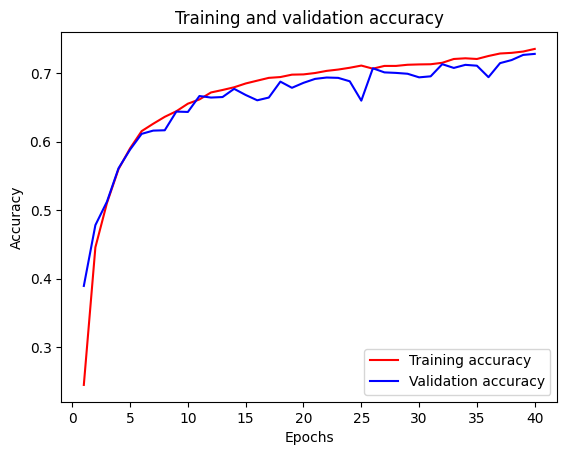

In [ ]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(x) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1

625/625 [==============================] - 1s 1ms/step
[6.1223013e-06 5.0505736e-08 1.1530209e-06 4.6370346e-07 2.4255346e-06
 8.5210078e-04 6.5719132e-09 1.0694319e-05 1.1141298e-02 1.0252486e-03
 4.6044406e-06 1.0903852e-05 2.7360826e-07 1.8885490e-04 4.9527138e-09
 3.6897368e-06 2.8243650e-07 2.6603371e-09 2.8429875e-05 9.0492076e-01
 1.3973505e-03 2.3819190e-03 5.3971307e-09 4.3900408e-02 3.4048166e-02
 7.4695025e-05]
0.9999999


In [ ]:
matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix

array([[706,  12,   0,   4,   0,   0,   0,   8,   0,   9,   6,   0,   4,
          1,   0,   1,   4,   2,   8,   5,   4,   0,   1,   4,   5,   5],
       [  2, 621,   0,   8,   0,  18,   7,  28,   0,   0,   0,   0,   0,
          0,   0,   2,   2,  43,  28,   5,   0,   0,   0,   2,   0,   0],
       [  0,   0, 540,   0,  28,   5,  62,  20,   5,   0,  36,   1,   2,
          0,   6,   1,   5,   0,   0,   3,  19,   0,   0,   3,   0,   0],
       [ 12,  32,   0, 645,   2,   3,   1,  32,   1,   1,   0,   1,   0,
          1,  14,   6,   0,  23,  17,   3,   4,   0,   0,   4,   0,   3],
       [  0,   5,  12,   1, 502,  11,  46,   8,   0,   0,  17,   5,   0,
          0,   0,   0,   6,   7,  61,   1,   0,   0,   0,  56,   0,  30],
       [  2,  15,   4,   6,   1, 601,   7,  18,  21,   3,   0,   0,   0,
         11,   0,  33,   0,   0,  13,  36,   0,   1,   1,   0,   2,   0],
       [  0,  25,  35,   6,   8,   5, 515,  17,   0,   1,  11,   2,   1,
          0,   2,   0,  68,  18,  36,   0,   

In [ ]:
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       789
           1       0.72      0.81      0.76       766
           2       0.83      0.73      0.78       736
           3       0.81      0.80      0.80       805
           4       0.79      0.65      0.71       768
           5       0.71      0.78      0.74       775
           6       0.60      0.67      0.63       773
           7       0.58      0.72      0.64       734
           8       0.79      0.85      0.82       755
           9       0.80      0.86      0.83       747
          10       0.79      0.74      0.76       739
          11       0.94      0.80      0.86       761
          12       0.96      0.90      0.93       792
          13       0.89      0.84      0.87       783
          14       0.76      0.76      0.76       753
          15       0.89      0.82      0.85       803
          16       0.77      0.65      0.71       783
          17       0.73    

After hyper parameter tuning accuracy improved from 64% to 78% and the model seems good.